### Loading the libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import math
from sklearn.metrics import mean_squared_error

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\sekhs\\Desktop'

### Loading the dataset:

In [2]:
data=pd.read_csv('eth.csv')

In [3]:
data.head(10)

,date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2021-10-06,3515.48,3538.70,3502.80,3517.71,3517.71,11513.0,0.0,1.0
1,2021-10-05,3386.31,3545.00,3363.78,3515.27,3515.27,393900.0,0.0,1.0
2,2021-10-04,3417.73,3437.19,3270.00,3386.31,3386.31,485204.0,0.0,1.0
3,2021-10-03,3387.77,3488.00,3342.51,3417.73,3417.73,360586.0,0.0,1.0
4,2021-10-02,3309.91,3469.00,3257.00,3387.76,3387.76,422551.0,0.0,1.0
5,2021-10-01,3000.62,3330.00,2969.07,3309.91,3309.91,648714.0,0.0,1.0
6,2021-09-30,2850.45,3048.42,2837.19,3000.61,3000.61,506896.0,0.0,1.0
7,2021-09-29,2805.15,2950.00,2782.00,2850.45,2850.45,411305.0,0.0,1.0
8,2021-09-28,2924.76,2970.82,2789.00,2804.91,2804.91,511325.0,0.0,1.0
9,2021-09-27,3059.36,3164.94,2922.71,2925.59,2925.59,510130.0,0.0,1.0


In [7]:
### it can be seen that the data is in the reverse order an we need to sort it.

In [8]:
data.describe()

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
count,100.00000,100.000000,100.000000,100.000000,100.000000,1.000000e+02,100.0,100.0
mean,2856.68220,2958.657500,2752.698700,2871.021300,2871.021300,6.402530e+05,0.0,1.0
std,590.31011,599.255627,566.961405,588.760742,588.760742,2.366219e+05,0.0,0.0
min,1786.03000,1841.340000,1706.000000,1786.030000,1786.030000,1.151300e+04,0.0,1.0
25%,2263.71250,2340.150000,2168.007500,2293.537500,2293.537500,4.797690e+05,0.0,1.0
50%,3013.01000,3172.750000,2918.050000,3030.255000,3030.255000,6.269500e+05,0.0,1.0
75%,3290.65500,3362.860000,3191.577500,3307.795000,3307.795000,7.826870e+05,0.0,1.0
max,3950.28000,4027.880000,3864.300000,3950.290000,3950.290000,1.393738e+06,0.0,1.0


##### since the data is in different ranges, we need to scale them to the same range as our model will work better and faster after that.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               100 non-null    object 
 1   open               100 non-null    float64
 2   high               100 non-null    float64
 3   low                100 non-null    float64
 4   close              100 non-null    float64
 5   adjusted_close     100 non-null    float64
 6   volume             100 non-null    float64
 7   dividend_amount    100 non-null    float64
 8   split_coefficient  100 non-null    float64
dtypes: float64(8), object(1)
memory usage: 7.2+ KB


##### It can be seen that there are no null values in the dataset
##### As date is in the form of object, converting into datetime format will help us sort the dataframe and also help in the prediction

In [10]:
data['date']=pd.to_datetime(data['date'])

##### Sorting the values in the ascending order according to the date.

In [11]:
data=data.sort_values(by='date')

In [12]:
dateslist=data['date']

##### setting the index as date

In [13]:
data.set_index('date',inplace=True)

In [14]:
data['diff']=data['close']-data['adjusted_close']

In [15]:
data['diff'].value_counts()

0.0    100
Name: diff, dtype: int64

##### As it can be seen that adjusted closing price and the closing price is same in our records, we can drop adjusted close price

In [16]:
data['dividend_amount'].value_counts()

0.0    100
Name: dividend_amount, dtype: int64

In [17]:
data['split_coefficient'].value_counts()

1.0    100
Name: split_coefficient, dtype: int64

#####  From the above value counts of dividend and split coefficient, we can see that they have same values throughout the dataset and so they won't be useful as features to predict the closing price, hence, we can ignore them too.

In [18]:
target=data[['close']]

### Plotting the various features

In [5]:
columns=['open', 'high', 'low','volume','close']

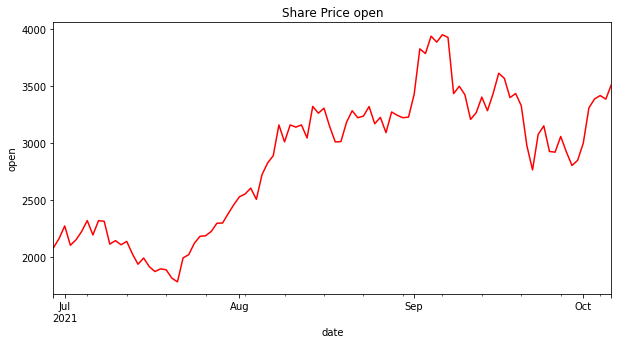

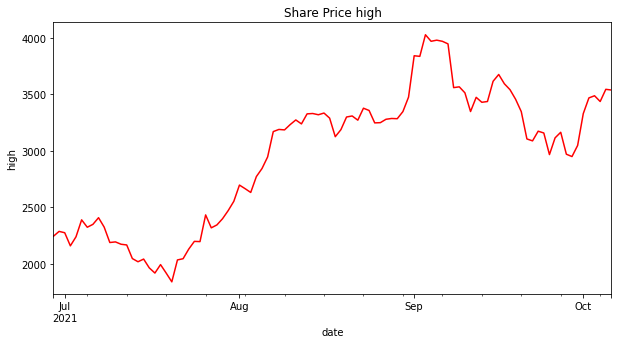

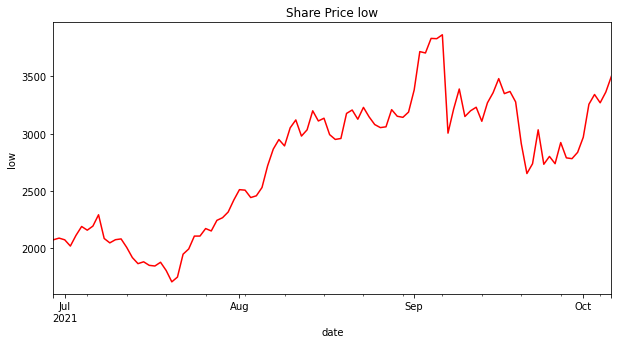

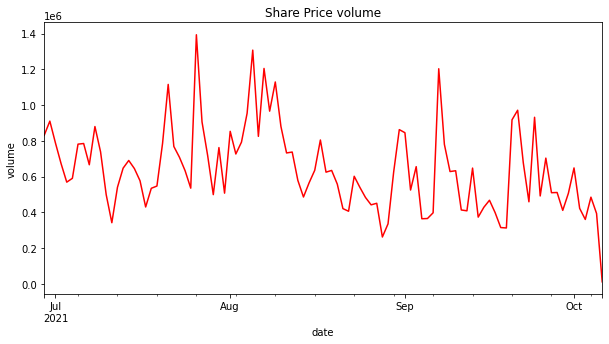

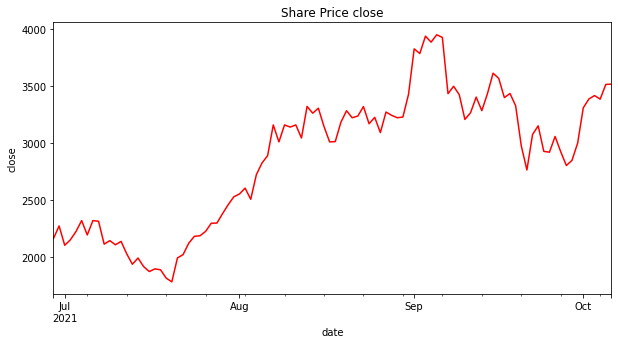

In [20]:
for feature in columns:
    data[feature].plot(color = "Red",figsize = (10,5), title = "Share Price"+' '+ feature, ylabel = feature)
    plt.show()

##### using seaborn for a color palette to show how the prices and other features are changing

In [6]:
mapview=data[columns]
cm = sns.light_palette("green", as_cmap=True)
mapview.head(50).style.background_gradient(cmap=cm)

,open,high,low,volume,close
0,3515.480000,3538.700000,3502.800000,11513.000000,3517.710000
1,3386.310000,3545.000000,3363.780000,393900.000000,3515.270000
2,3417.730000,3437.190000,3270.000000,485204.000000,3386.310000
3,3387.770000,3488.000000,3342.510000,360586.000000,3417.730000
4,3309.910000,3469.000000,3257.000000,422551.000000,3387.760000
5,3000.620000,3330.000000,2969.070000,648714.000000,3309.910000
6,2850.450000,3048.420000,2837.190000,506896.000000,3000.610000
7,2805.150000,2950.000000,2782.000000,411305.000000,2850.450000
8,2924.760000,2970.820000,2789.000000,511325.000000,2804.910000
9,3059.360000,3164.940000,2922.710000,510130.000000,2925.590000


### Looking at the corelation of various features with the close price

In [22]:
#### correlation with the closing value and other features 

In [23]:
corr_matrix=data[columns].corr()
corr_matrix['close'].sort_values(ascending=False)

close     1.000000
high      0.989116
low       0.987071
open      0.972744
volume   -0.292588
Name: close, dtype: float64

<AxesSubplot:>

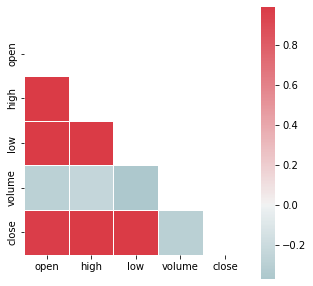

In [24]:
mask = np.zeros_like(corr_matrix ,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.diverging_palette(210, 10, as_cmap=True)
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, square = True, center = 0, linewidths=.5, ax=ax)

In [25]:
mapview.head(10)

,open,high,low,volume,close
date,,,,,
2021-06-29,2084.42,2245.00,2073.57,831257.0,2165.33
2021-06-30,2165.46,2287.78,2087.99,910583.0,2275.68
2021-07-01,2275.68,2275.93,2073.12,787865.0,2106.41
2021-07-02,2106.41,2160.00,2018.50,672282.0,2154.13
2021-07-03,2153.95,2240.00,2112.01,569264.0,2226.99
2021-07-04,2226.99,2389.93,2189.58,590656.0,2322.69
2021-07-05,2322.69,2324.64,2157.32,781806.0,2196.53
2021-07-06,2196.85,2350.00,2193.00,785330.0,2322.50
2021-07-07,2322.51,2409.00,2291.90,666501.0,2316.57


In [26]:
mapview['closeforprediction']=mapview['close'].shift(-6)

In [27]:
mapview.head(20)

,open,high,low,volume,close,closeforprediction
date,,,,,,
2021-06-29,2084.42,2245.00,2073.57,831257.0,2165.33,2196.53
2021-06-30,2165.46,2287.78,2087.99,910583.0,2275.68,2322.50
2021-07-01,2275.68,2275.93,2073.12,787865.0,2106.41,2316.57
2021-07-02,2106.41,2160.00,2018.50,672282.0,2154.13,2116.33
2021-07-03,2153.95,2240.00,2112.01,569264.0,2226.99,2146.99
2021-07-04,2226.99,2389.93,2189.58,590656.0,2322.69,2110.69
2021-07-05,2322.69,2324.64,2157.32,781806.0,2196.53,2140.45
2021-07-06,2196.85,2350.00,2193.00,785330.0,2322.50,2031.58
2021-07-07,2322.51,2409.00,2291.90,666501.0,2316.57,1940.15


In [28]:
#### correlation of the 6th day close value with the present variables.

In [29]:
corr_matrix=mapview.corr()
corr_matrix['closeforprediction'].sort_values(ascending=False)

closeforprediction    1.000000
high                  0.828666
close                 0.827420
low                   0.821370
open                  0.813787
volume               -0.131800
Name: closeforprediction, dtype: float64

##### it can be seen that all the features are well related except volume, but we will still use volume as it is the only negatively correlated feature and see its effect on our model.

### Scaling the data, as all the features have different scale.

In [30]:

scaler=StandardScaler()
data_model=data[columns]
scaled_data=scaler.fit_transform(data_model)
scaled_df=pd.DataFrame(columns=columns,data=scaled_data,index=data_model.index)
scaled_df

,open,high,low,volume,close
date,,,,,
2021-06-29,-1.314822,-1.196906,-1.203874,0.811278,-1.204643
2021-06-30,-1.176847,-1.125158,-1.178312,1.148211,-1.016271
2021-07-01,-0.989191,-1.145032,-1.204672,0.626973,-1.305222
2021-07-02,-1.277383,-1.339463,-1.301495,0.136041,-1.223762
2021-07-03,-1.196443,-1.205292,-1.135732,-0.301522,-1.099387
...,...,...,...,...,...
2021-10-02,0.771647,0.855918,0.893962,-0.924677,0.882093
2021-10-03,0.904208,0.887783,1.045543,-1.187870,0.933253
2021-10-04,0.955217,0.802568,0.917007,-0.658562,0.879618


In [31]:
train_data=scaled_data
len(train_data)

100

In [32]:
#### Training a LSTM model with only 1 feature- close price

In [33]:
past=7
future=6

In [34]:
X_train,y_train=[],[]
for i in range(past,len(train_data)-future+1):
    X_train.append(train_data[i-past:i,4:5])
    y_train.append(train_data[i+future-1:i+future,4:5])

X_train=np.array(X_train)
y_train=np.array(y_train)

X_train.shape,y_train.shape

((88, 7, 1), (88, 1, 1))

In [35]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(y_train.shape[1]))
model.compile(optimizer='adam',loss='mse')

model.summary()

model_onlyclose=model.fit(X_train,y_train,validation_split=0.1,epochs=400,batch_size=16,verbose=1)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
5/5 [==============================] - 7s 352ms/step - loss: 0.9268 - val_loss: 0.5312
Epoch 2/400
5/5 [==============================] - 0s 20ms/step - loss: 0.7438 - val_loss: 0.4819
Epoch 3/400
5/5 [==============================] - 0s

Epoch 75/400
5/5 [==============================] - 0s 25ms/step - loss: 0.1687 - val_loss: 0.2293
Epoch 76/400
5/5 [==============================] - 0s 25ms/step - loss: 0.1798 - val_loss: 0.2233
Epoch 77/400
5/5 [==============================] - 0s 25ms/step - loss: 0.1719 - val_loss: 0.2271
Epoch 78/400
5/5 [==============================] - 0s 25ms/step - loss: 0.1833 - val_loss: 0.2325
Epoch 79/400
5/5 [==============================] - 0s 27ms/step - loss: 0.1694 - val_loss: 0.2359
Epoch 80/400
5/5 [==============================] - 0s 27ms/step - loss: 0.1720 - val_loss: 0.2238
Epoch 81/400
5/5 [==============================] - 0s 27ms/step - loss: 0.1729 - val_loss: 0.2288
Epoch 82/400
5/5 [==============================] - 0s 26ms/step - loss: 0.1691 - val_loss: 0.2272
Epoch 83/400
5/5 [==============================] - 0s 24ms/step - loss: 0.1652 - val_loss: 0.2287
Epoch 84/400
5/5 [==============================] - 0s 24ms/step - loss: 0.1667 - val_loss: 0.2356
Epoch 85/4

5/5 [==============================] - 0s 27ms/step - loss: 0.1520 - val_loss: 0.2399
Epoch 240/400
5/5 [==============================] - 0s 27ms/step - loss: 0.1526 - val_loss: 0.2440
Epoch 241/400
5/5 [==============================] - 0s 26ms/step - loss: 0.1571 - val_loss: 0.2395
Epoch 242/400
5/5 [==============================] - 0s 26ms/step - loss: 0.1502 - val_loss: 0.2395
Epoch 243/400
5/5 [==============================] - 0s 25ms/step - loss: 0.1608 - val_loss: 0.2373
Epoch 244/400
5/5 [==============================] - 0s 24ms/step - loss: 0.1512 - val_loss: 0.2402
Epoch 245/400
5/5 [==============================] - 0s 25ms/step - loss: 0.1543 - val_loss: 0.2457
Epoch 246/400
5/5 [==============================] - 0s 25ms/step - loss: 0.1578 - val_loss: 0.2513
Epoch 247/400
5/5 [==============================] - 0s 25ms/step - loss: 0.1549 - val_loss: 0.2451
Epoch 248/400
5/5 [==============================] - 0s 25ms/step - loss: 0.1557 - val_loss: 0.2417
Epoch 249/400


5/5 [==============================] - 0s 26ms/step - loss: 0.1477 - val_loss: 0.2424
Epoch 322/400
5/5 [==============================] - 0s 25ms/step - loss: 0.1481 - val_loss: 0.2402
Epoch 323/400
5/5 [==============================] - 0s 24ms/step - loss: 0.1481 - val_loss: 0.2475
Epoch 324/400
5/5 [==============================] - 0s 25ms/step - loss: 0.1480 - val_loss: 0.2405
Epoch 325/400
5/5 [==============================] - 0s 24ms/step - loss: 0.1472 - val_loss: 0.2477
Epoch 326/400
5/5 [==============================] - 0s 25ms/step - loss: 0.1481 - val_loss: 0.2485
Epoch 327/400
5/5 [==============================] - 0s 26ms/step - loss: 0.1466 - val_loss: 0.2394
Epoch 328/400
5/5 [==============================] - 0s 25ms/step - loss: 0.1483 - val_loss: 0.2378
Epoch 329/400
5/5 [==============================] - 0s 25ms/step - loss: 0.1466 - val_loss: 0.2457
Epoch 330/400
5/5 [==============================] - 0s 25ms/step - loss: 0.1485 - val_loss: 0.2494
Epoch 331/400


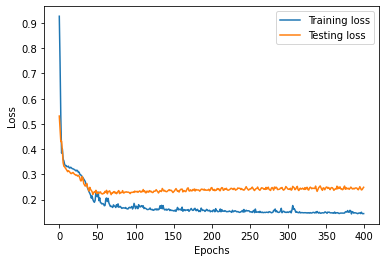

In [36]:

plt.plot(model_onlyclose.history['loss'],label='Training loss')
plt.plot(model_onlyclose.history['val_loss'],label='Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [37]:
train_prediction=model_onlyclose.model.predict(X_train)
train_prediction_c=np.repeat(train_prediction,scaled_data.shape[1],axis=-1)
train_pred=scaler.inverse_transform(train_prediction_c)[:,0]
train_pred.shape

(88,)

In [38]:
index_pred_train=pd.date_range(start='2021-07-11',periods=88,freq='D')
pred_df_train=pd.DataFrame(data=train_pred,index=index_pred_train,columns=['pred_train'])

<AxesSubplot:xlabel='date'>

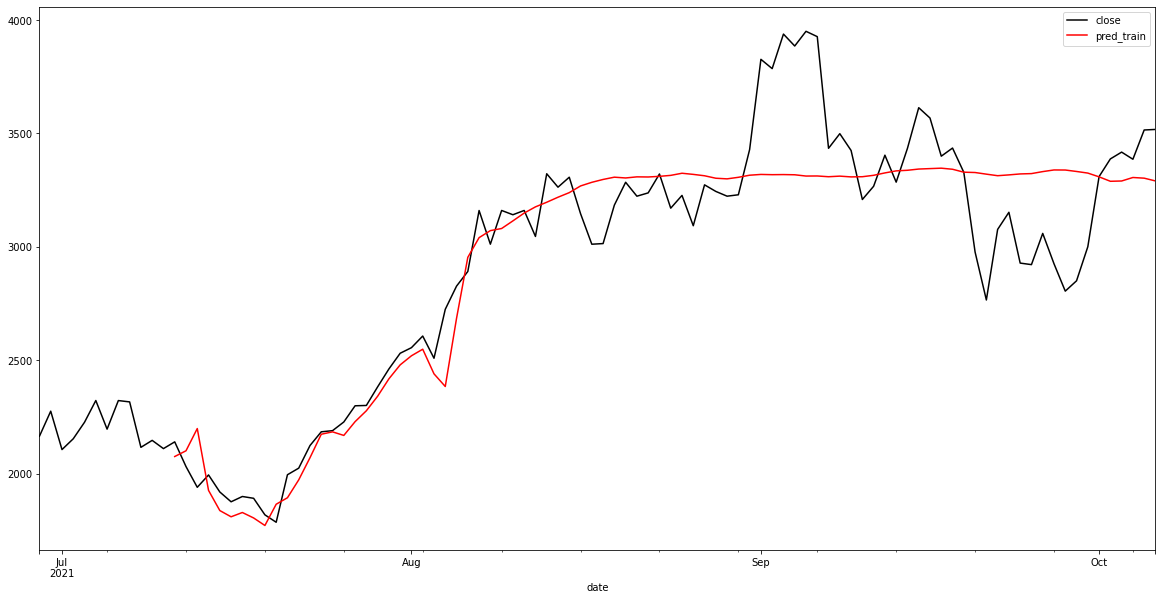

In [39]:
ax=target.plot(figsize=(20,10),color='black')
pred_df_train.plot(ax=ax,color='red')

In [40]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(target[12:100],train_pred))

230.79954986471145

#### it can be seen that the model is not working too good in the case of only one feature, now lets try with multiple features.

## Training the model with all the features.

In [31]:
trainingsize=int(len(data)*0.8)
testingsize=len(data)-trainingsize

In [32]:
train_data=scaled_data[0:trainingsize]
test_data=scaled_data[trainingsize:trainingsize+testingsize]

In [33]:
len(train_data),len(test_data)

(80, 20)

In [34]:
past=6
future=1

In [35]:
X_train,y_train=[],[]
for i in range(past,len(train_data)-future+1):
    X_train.append(train_data[i-past:i,0:train_data.shape[1]])
    y_train.append(train_data[i+future-1:i+future,4])

X_train=np.array(X_train)
y_train=np.array(y_train)

X_train.shape,y_train.shape

((74, 6, 5), (74, 1))

In [36]:
X_test,y_test=[],[]
for i in range(past,len(test_data)-future+1):
    X_test.append(test_data[i-past:i,0:train_data.shape[1]])
    y_test.append(test_data[i+future-1:i+future,4])
    
X_test=np.array(X_test)
y_test=np.array(y_test)

X_test.shape,y_test.shape

((14, 6, 5), (14, 1))

In [37]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(y_train.shape[1]))
model.compile(optimizer='adam',loss='mse')

model.summary()

model_allfeatures=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=70,batch_size=16,verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 50)             11200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 6, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 51,651
Trainable params: 51,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
5/5 [==============================] - 8s 355ms/step - loss: 1.0946 - val_loss: 0.3646
Epoch 2/70
5/5 [==============================] - 0s 19ms/step - loss: 0.8039 - val_loss: 0.3282
Epoch 3/70
5/5 [==============================] - 0s 22

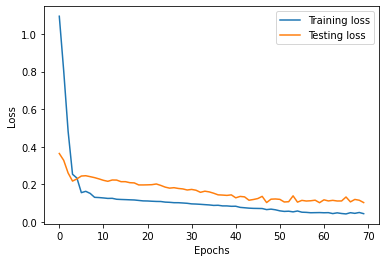

In [38]:
plt.plot(model_allfeatures.history['loss'],label='Training loss')
plt.plot(model_allfeatures.history['val_loss'],label='Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [39]:
train_prediction=model_allfeatures.model.predict(X_train)

test_prediction=model_allfeatures.model.predict(X_test)

train_prediction_c=np.repeat(train_prediction,scaled_data.shape[1],axis=-1)

test_prediction_c=np.repeat(test_prediction,scaled_data.shape[1],axis=-1)

train_pred=scaler.inverse_transform(train_prediction_c)[:,0]

test_pred=scaler.inverse_transform(test_prediction_c)[:,0]

train_pred.shape,test_pred.shape

((74,), (14,))

In [40]:
index_pred_train=pd.date_range(start='2021-07-04',periods=74,freq='D')

pred_df_train=pd.DataFrame(data=train_pred,index=index_pred_train,columns=['pred_train'])

index_pred_test=pd.date_range(start='2021-09-23',periods=14,freq='D')

pred_df_test=pd.DataFrame(data=test_pred,index=index_pred_test,columns=['pred_test'])

<AxesSubplot:xlabel='date'>

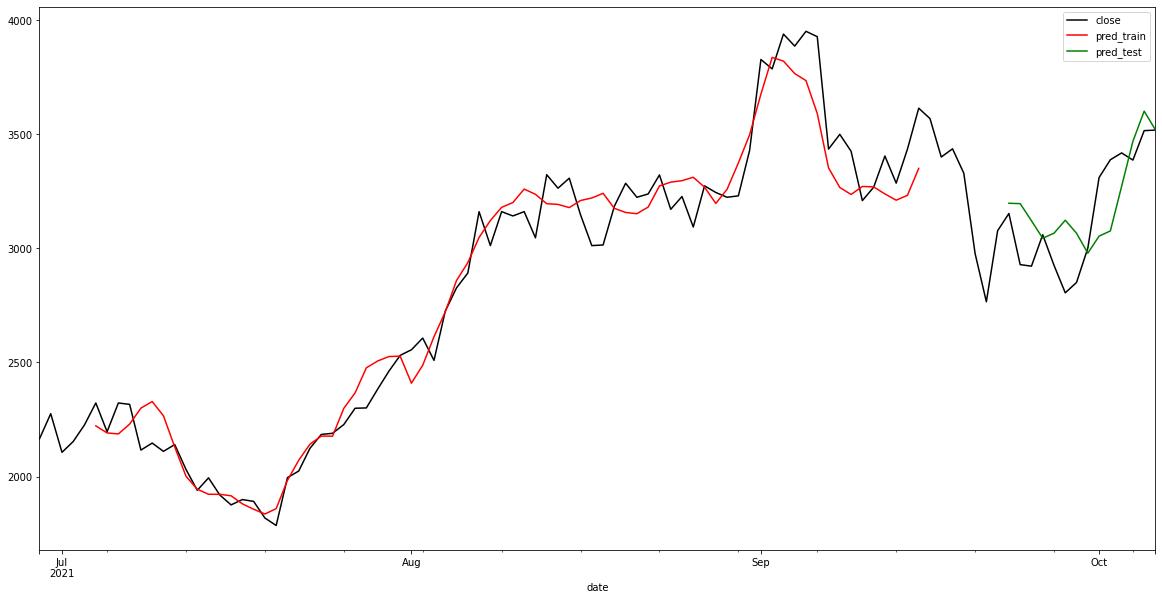

In [41]:
ax=target.plot(figsize=(20,10),color='black')
pred_df_train.plot(ax=ax,color='red')
pred_df_test.plot(ax=ax,color='green')

In [42]:
math.sqrt(mean_squared_error(target[-14:],test_pred))

185.04709500100714

#### It can be seen that the model performs better with all the features and so now we can use this model to predict the value for the 6th day.

## Model training with multiple features for a period of 7 days and predicting the value for 6th day

In [32]:
train_data=scaled_data
len(train_data)

100

In [33]:
past=7
future=6

In [34]:
X_train,y_train=[],[]
for i in range(past,len(train_data)-future+1):
    X_train.append(train_data[i-past:i,0:train_data.shape[1]])
    y_train.append(train_data[i+future-1:i+future,4])

X_train=np.array(X_train)
y_train=np.array(y_train)

X_train.shape,y_train.shape


((88, 7, 5), (88, 1))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 50)             11200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 51,651
Trainable params: 51,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/110
5/5 [==============================] - 7s 377ms/step - loss: 0.8858 - val_loss: 0.5218
Epoch 2/110
5/5 [==============================] - 0s 29ms/step - loss: 0.5993 - val_loss: 0.4944
Epoch 3/110
5/5 [==============================] - 0s

Epoch 75/110
5/5 [==============================] - 0s 35ms/step - loss: 0.1003 - val_loss: 0.2492
Epoch 76/110
5/5 [==============================] - 0s 35ms/step - loss: 0.0953 - val_loss: 0.2629
Epoch 77/110
5/5 [==============================] - 0s 33ms/step - loss: 0.0969 - val_loss: 0.2921
Epoch 78/110
5/5 [==============================] - 0s 33ms/step - loss: 0.0930 - val_loss: 0.2564
Epoch 79/110
5/5 [==============================] - 0s 35ms/step - loss: 0.0901 - val_loss: 0.2434
Epoch 80/110
5/5 [==============================] - 0s 32ms/step - loss: 0.0891 - val_loss: 0.2567
Epoch 81/110
5/5 [==============================] - 0s 31ms/step - loss: 0.0874 - val_loss: 0.2466
Epoch 82/110
5/5 [==============================] - 0s 29ms/step - loss: 0.0845 - val_loss: 0.2497
Epoch 83/110
5/5 [==============================] - 0s 26ms/step - loss: 0.0829 - val_loss: 0.2367
Epoch 84/110
5/5 [==============================] - 0s 24ms/step - loss: 0.0809 - val_loss: 0.2326
Epoch 85/1

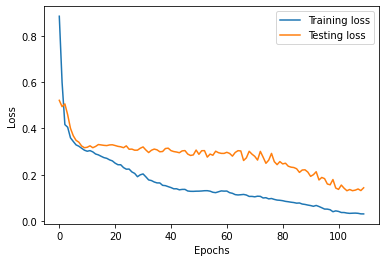

In [35]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(y_train.shape[1]))
model.compile(optimizer='adam',loss='mse')

model.summary()

model_allfeatures_main=model.fit(X_train,y_train,validation_split=0.1,epochs=110,batch_size=16,verbose=1)

plt.plot(model_allfeatures_main.history['loss'],label='Training loss')
plt.plot(model_allfeatures_main.history['val_loss'],label='Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()







In [36]:
train_prediction=model_allfeatures_main.model.predict(X_train)

X_train.shape

train_prediction_c=np.repeat(train_prediction,scaled_data.shape[1],axis=-1)

train_pred=scaler.inverse_transform(train_prediction_c)[:,0]

train_pred.shape


(88,)

In [37]:
index_pred_train=pd.date_range(start='2021-07-11',periods=88,freq='D')

pred_df_train=pd.DataFrame(data=train_pred,index=index_pred_train,columns=['pred_train'])

<AxesSubplot:xlabel='date'>

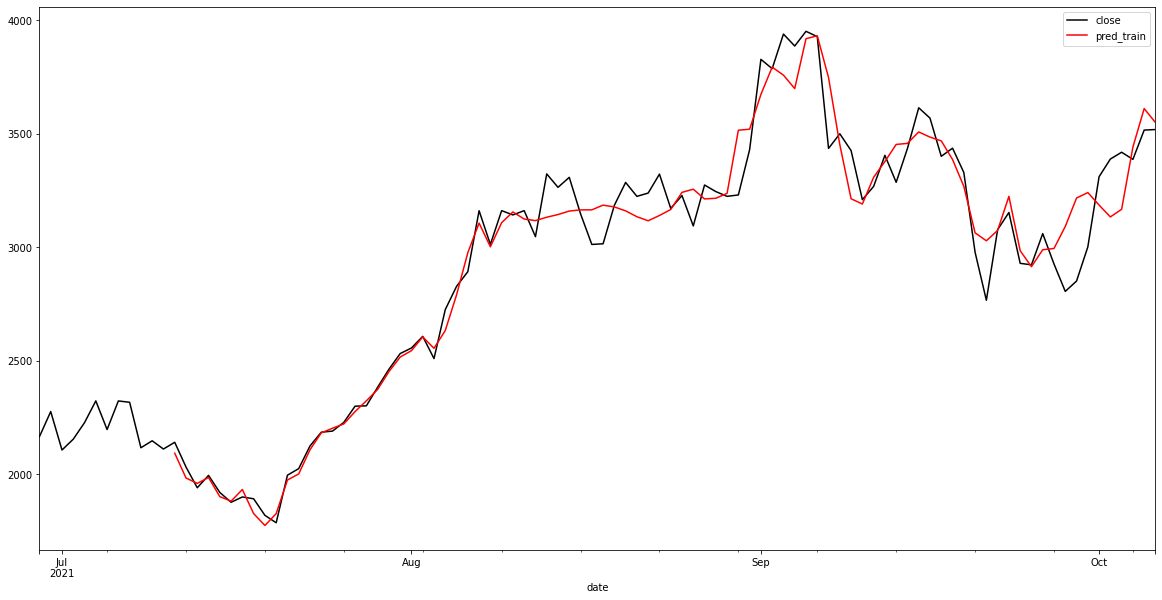

In [38]:
ax=target.plot(figsize=(20,10),color='black')
pred_df_train.plot(ax=ax,color='red')


In [39]:
import math

from sklearn.metrics import mean_squared_error

#### Calculating the rmse

X_train.shape

math.sqrt(mean_squared_error(target[12:100],train_pred))

116.1532250559406

## Just to experiment:
#### Training multiple featutes giving one day as data and predicting 6 datapoints ahead

In [32]:
trainingsize=int(len(data)*0.8)
testingsize=len(data)-trainingsize

train_data=scaled_data[0:trainingsize]
test_data=scaled_data[trainingsize:trainingsize+testingsize]


len(train_data),len(test_data)

(80, 20)

In [33]:
past=1
future=6

In [34]:
X_train,y_train=[],[]
for i in range(past,len(train_data)-future+1):
    X_train.append(train_data[i-past:i,0:train_data.shape[1]])
    y_train.append(train_data[i+future-1:i+future,4])

X_train=np.array(X_train)
y_train=np.array(y_train)

X_train.shape,y_train.shape

X_test,y_test=[],[]
for i in range(past,len(test_data)-future+1):
    X_test.append(test_data[i-past:i,0:train_data.shape[1]])
    y_test.append(test_data[i+future-1:i+future,4])

X_test=np.array(X_test)
y_test=np.array(y_test)

In [35]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(y_train.shape[1]))
model.compile(optimizer='adam',loss='mse')

model.summary()

model_allfeaturesexp=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=300,batch_size=16,verbose=1)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 50)             11200     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 51,651
Trainable params: 51,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
5/5 [==============================] - 7s 333ms/step - loss: 1.1286 - val_loss: 0.4163
Epoch 2/300
5/5 [==============================] - 0s 15ms/step - loss: 1.1143 - val_loss: 0.4164
Epoch 3/300
5/5 [==============================] - 0s

Epoch 75/300
5/5 [==============================] - 0s 16ms/step - loss: 0.1733 - val_loss: 0.3290
Epoch 76/300
5/5 [==============================] - 0s 16ms/step - loss: 0.1730 - val_loss: 0.3323
Epoch 77/300
5/5 [==============================] - 0s 16ms/step - loss: 0.1730 - val_loss: 0.3347
Epoch 78/300
5/5 [==============================] - 0s 15ms/step - loss: 0.1722 - val_loss: 0.3362
Epoch 79/300
5/5 [==============================] - 0s 16ms/step - loss: 0.1727 - val_loss: 0.3352
Epoch 80/300
5/5 [==============================] - 0s 16ms/step - loss: 0.1734 - val_loss: 0.3399
Epoch 81/300
5/5 [==============================] - 0s 15ms/step - loss: 0.1728 - val_loss: 0.3407
Epoch 82/300
5/5 [==============================] - 0s 14ms/step - loss: 0.1721 - val_loss: 0.3331
Epoch 83/300
5/5 [==============================] - 0s 16ms/step - loss: 0.1726 - val_loss: 0.3334
Epoch 84/300
5/5 [==============================] - 0s 16ms/step - loss: 0.1715 - val_loss: 0.3306
Epoch 85/3

5/5 [==============================] - 0s 18ms/step - loss: 0.1375 - val_loss: 0.4197
Epoch 240/300
5/5 [==============================] - 0s 18ms/step - loss: 0.1374 - val_loss: 0.4097
Epoch 241/300
5/5 [==============================] - 0s 18ms/step - loss: 0.1365 - val_loss: 0.4153
Epoch 242/300
5/5 [==============================] - 0s 17ms/step - loss: 0.1373 - val_loss: 0.4422
Epoch 243/300
5/5 [==============================] - 0s 15ms/step - loss: 0.1365 - val_loss: 0.4286
Epoch 244/300
5/5 [==============================] - 0s 17ms/step - loss: 0.1372 - val_loss: 0.4083
Epoch 245/300
5/5 [==============================] - 0s 17ms/step - loss: 0.1366 - val_loss: 0.4002
Epoch 246/300
5/5 [==============================] - 0s 15ms/step - loss: 0.1356 - val_loss: 0.4235
Epoch 247/300
5/5 [==============================] - 0s 14ms/step - loss: 0.1355 - val_loss: 0.4442
Epoch 248/300
5/5 [==============================] - 0s 14ms/step - loss: 0.1360 - val_loss: 0.4576
Epoch 249/300


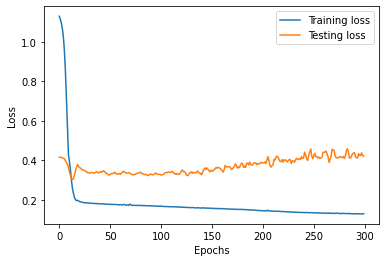

In [36]:
plt.plot(model_allfeaturesexp.history['loss'],label='Training loss')
plt.plot(model_allfeaturesexp.history['val_loss'],label='Testing loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



In [37]:
train_prediction=model_allfeaturesexp.model.predict(X_train)

train_prediction_c=np.repeat(train_prediction,scaled_data.shape[1],axis=-1)

train_pred=scaler.inverse_transform(train_prediction_c)[:,0]

train_pred.shape

(74,)

In [38]:
index_pred_train=pd.date_range(start='2021-07-05',periods=74,freq='D')

pred_df_train=pd.DataFrame(data=train_pred,index=index_pred_train,columns=['pred_train'])

<AxesSubplot:xlabel='date'>

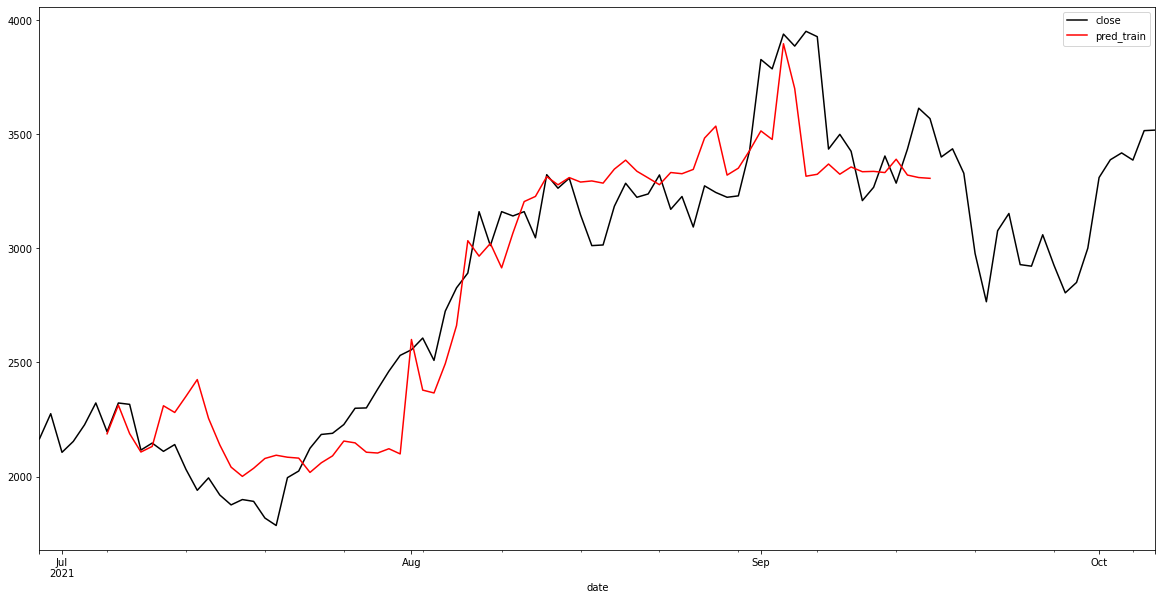

In [39]:
ax=target.plot(figsize=(20,10),color='black')
pred_df_train.plot(ax=ax,color='red')

In [40]:
test_prediction=model_allfeaturesexp.model.predict(X_test)
test_prediction_c=np.repeat(test_prediction,scaled_data.shape[1],axis=-1)
test_pred=scaler.inverse_transform(test_prediction_c)[:,0]

In [41]:
index_pred_test=pd.date_range(start='2021-09-23',periods=14,freq='D')
pred_df_test=pd.DataFrame(data=test_pred,index=index_pred_test,columns=['pred_train'])

In [46]:
math.sqrt(mean_squared_error(target[-14:],test_pred))

370.84630157542483

In [43]:
### It can be seen that giving one day as a training doesnt works well in this model.

### Conclusion

##### the model with all the features taking 7 days data for training and predicting the 6th data point works the best.